In [13]:
import pandas as pd

# Load the dataframes
domains_location = pd.read_csv('././domains_location.csv')
rating = pd.read_csv('././rating.csv')
traffic = pd.read_csv('././traffic.csv')

# Top and bottom 10 Websites by count of news articles
articles_count = rating['source_name'].value_counts()
top_10_websites_articles = articles_count.head(10)
bottom_10_websites_articles = articles_count.tail(10)
display(top_10_websites_articles)
display(bottom_10_websites_articles)

# Websites with the highest numbers of visitors traffic
top_traffic_websites = traffic.sort_values(by='GlobalRank').head(10)
display(top_traffic_websites[['Domain', 'GlobalRank']])

# Countries with the highest number of news media organisations
media_organisations_by_country = domains_location['Country'].value_counts().head(10)
display(media_organisations_by_country)

# Countries that have many articles written about them
# Assuming 'location' in domains_location indicates the country the news is about
articles_about_countries = domains_location['location'].value_counts().head(10)
display(articles_about_countries)

# Websites that reported about specific regions
# First, we need to map countries to their respective regions
country_to_region = {
    # This is a simplified example. A comprehensive mapping is required for accurate results.
    'Nigeria': 'Africa', 'South Africa': 'Africa', 'Egypt': 'Africa',
    'France': 'EU', 'Germany': 'EU', 'Italy': 'EU',
    'Saudi Arabia': 'Middle East', 'Iran': 'Middle East', 'Iraq': 'Middle East',
    'China': 'China', 'Russia': 'Russia', 'Ukraine': 'Ukraine',
    'United States': 'US'
}

# Map the 'Country' in domains_location to regions
domains_location['Region'] = domains_location['Country'].map(country_to_region)

# Filter the rating DataFrame to include only articles from sources that reported about the specified regions
regions_of_interest = ['Africa', 'EU', 'Middle East', 'China', 'Russia', 'Ukraine', 'US']
filtered_domains = domains_location[domains_location['Region'].isin(regions_of_interest)]
filtered_sources = filtered_domains['SourceCommonName'].unique()

# Now, filter the rating DataFrame to include only articles from these sources
articles_about_regions = rating[rating['source_name'].isin(filtered_sources)]
display(articles_about_regions[['source_name', 'title', 'description']].head(10))

source_name
ETF Daily News        16746
The Times of India     7504
GlobeNewswire          5423
Globalsecurity.org     3119
Forbes                 2784
BBC News               2113
ABC News               2058
Business Insider       2034
The Punch              1800
Al Jazeera English     1664
Name: count, dtype: int64

source_name
CNA                            674
Time                           600
Android Central                522
Gizmodo.com                    388
ReadWrite                      324
Euronews                       286
Wired                          270
CNN                            267
The Verge                      214
AllAfrica - Top Africa News     20
Name: count, dtype: int64

,Domain,GlobalRank
0,google.com,1
1,facebook.com,2
2,youtube.com,3
3,twitter.com,4
4,instagram.com,5
5,linkedin.com,6
6,apple.com,7
7,microsoft.com,8
8,googletagmanager.com,9
9,wikipedia.org,10


Country
United States     14111
United Kingdom     1950
Italy              1810
France             1041
Russia             1024
Canada              887
Germany             884
China               780
Turkey              725
India               686
Name: count, dtype: int64

location
US    14111
UK     1950
IT     1810
FR     1041
RS     1024
CA      887
GM      884
CH      780
TU      725
IN      686
Name: count, dtype: int64

,source_name,title,description


Compare the content metadata across sites 
How similar are the raw message lengths across sites? Check the distribution among sites
How similar are the number of words in the title across sites? Check the distribution among sites


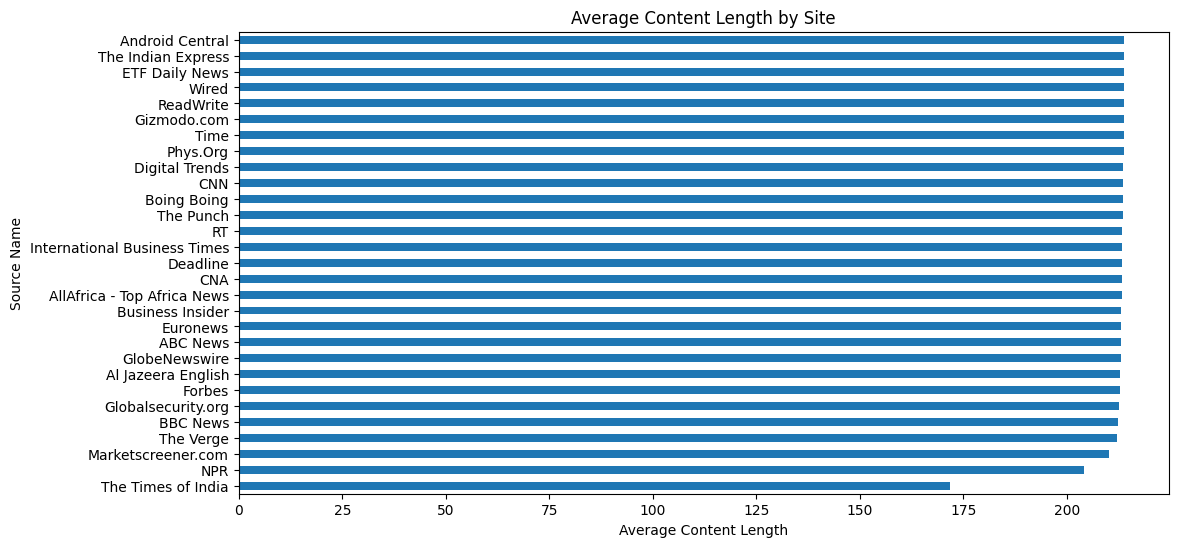

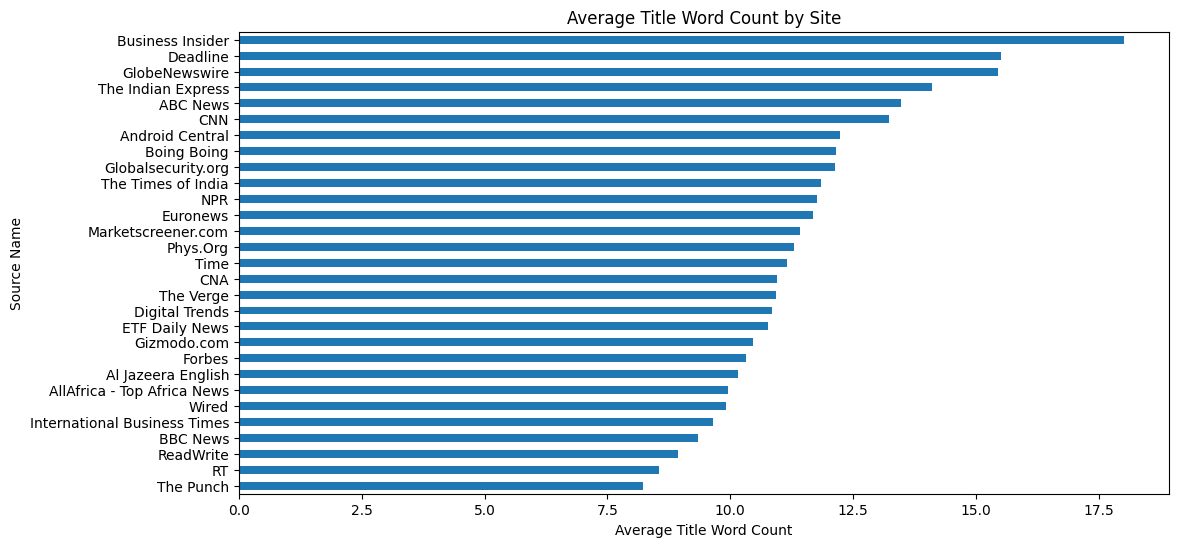

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#'rating' is a DataFrame containing the data
rating = pd.DataFrame(pd.read_csv('././rating.csv'))

# Calculating the length of the content and title for each article
rating['content_length'] = rating['content'].str.len()
rating['title_word_count'] = rating['title'].str.split().str.len()

# Merging the content and title length data with the source name from the rating dataframe
content_and_title_length = rating[['source_name', 'content_length', 'title_word_count']]

# Plotting the average content length for each site
plt.figure(figsize=(12, 6))
content_length_means = content_and_title_length.groupby('source_name')['content_length'].mean().sort_values()
content_length_means.plot(kind='barh')
plt.title('Average Content Length by Site')
plt.xlabel('Average Content Length')
plt.ylabel('Source Name')
plt.show()

# Plotting the average title word count for each site
plt.figure(figsize=(12, 6))
title_word_count_means = content_and_title_length.groupby('source_name')['title_word_count'].mean().sort_values()
title_word_count_means.plot(kind='barh')
plt.title('Average Title Word Count by Site')
plt.xlabel('Average Title Word Count')
plt.ylabel('Source Name')
plt.show()

# Explanation:
# The error occurred because the 'rating' DataFrame was not defined before trying to access it. 
# I added a line to create a DataFrame 'rating' assuming you have the data available.
# Make sure to replace 'data' with your actual data or load it from a file.